In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras import layers
# from tensorflow.keras.layers import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import LSTM
plt.style.use('fivethirtyeight')
from keras.layers import Activation, Dense
import requests
from tkinter import *
import math
import pprint

In [2]:
dataset = pd.read_csv('Updated22.csv', usecols=['Year','Month','Day','avgtempC','windspeedKmph','humidity', 'visibilityKm','pressureInches','cloudcover','HeatIndexC','weatherDesc','totalprecipMM'])

In [3]:
dataset

,Year,Month,Day,avgtempC,windspeedKmph,humidity,visibilityKm,pressureInches,cloudcover,HeatIndexC,weatherDesc,totalprecipMM
0,2008,7,1,24,16,67,10,30,60,26,1,0.3
1,2008,7,2,24,16,69,10,30,58,26,1,3.9
2,2008,7,3,25,12,68,9,30,39,26,1,9.8
3,2008,7,4,24,12,71,9,30,33,26,1,8.8
4,2008,7,5,24,13,72,10,30,31,25,1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4704,2021,5,18,28,18,56,9,30,57,30,1,9.4
4705,2021,5,19,28,24,58,10,30,32,29,1,2.1
4706,2021,5,20,28,22,55,10,30,26,29,1,0.4
4707,2021,5,21,28,20,57,10,30,30,29,1,0.7


In [4]:
datasetCSV = dataset.filter(['totalprecipMM'])
datasetCSV

,totalprecipMM
0,0.3
1,3.9
2,9.8
3,8.8
4,0.2
...,...
4704,9.4
4705,2.1
4706,0.4
4707,0.7


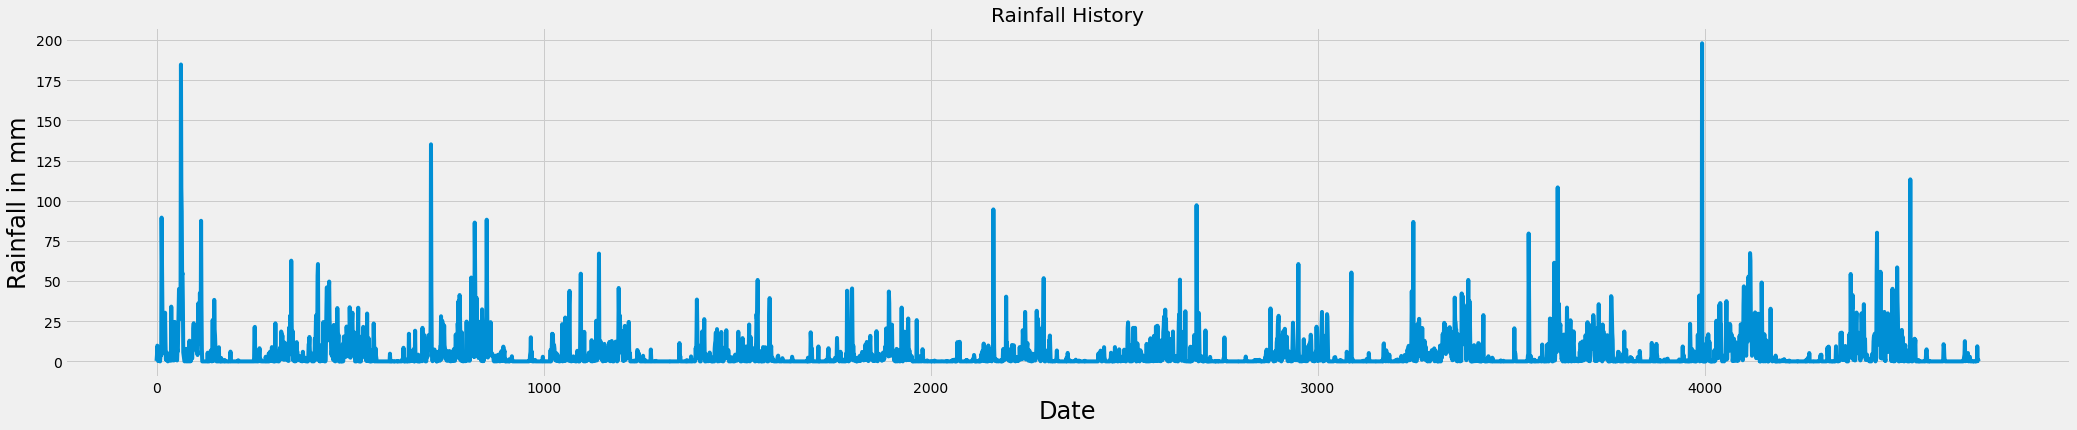

In [5]:
#Visualise the given data
plt.figure(figsize=(32,6))
plt.title('Rainfall History')
plt.plot(datasetCSV['totalprecipMM'])
plt.xlabel('Date',fontsize=24)
plt.ylabel('Rainfall in mm',fontsize=24)
plt.show()

In [6]:
# # # #Appending latest rain data to keep our dataset updated
# city = 'Bengaluru'
# apikey = '006ab4b0040b41589c3181415211905'


# def apicall(city,apikey): 
    
#     url = 'http://api.weatherapi.com/v1/current.json?key='+apikey+'&q='+city+'&aqi=no'
#     response = requests.get(url)
#     status =  (response.status_code)
#     api_string_data = response.text
#     print("This is the api call data:\n")
#     print(api_string_data,"\n")
#     print("The value of rain in mm which we append to our database:\n")
#     rain_mm = api_string_data[533:536]
#     print(rain_mm)
#     return rain_mm
    
    
# to_append = apicall(city, apikey)

In [7]:
# dfnew = pd.DataFrame({"totalprecipMM":[to_append]})
# dataset.append(dfnew, ignore_index = True)

In [8]:
## Converting the rain values into a numpy array
datasetARR = datasetCSV.values
print(datasetARR)

[[0.3]
 [3.9]
 [9.8]
 ...
 [0.4]
 [0.7]
 [0.1]]


In [9]:
print(len(datasetARR))
print(type(datasetARR))

4709
<class 'numpy.ndarray'>


In [10]:
# Get the number of rows to train the model on
training_data_len = math.ceil(len(datasetARR) * 0.8)
training_data_len

3768

In [11]:
# Here we scale the data to process the input data before we present it to the neural network.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(datasetARR)

scaled_data

array([[0.00151515],
       [0.01969697],
       [0.04949495],
       ...,
       [0.0020202 ],
       [0.00353535],
       [0.00050505]])

In [12]:
#Create training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(365, len(train_data)):
    x_train.append(train_data[i-365:i, 0])
    y_train.append(train_data[i, 0])
    if(i<=365):
        print(x_train)
        print() 
        print()
        print(y_train)


[array([1.51515152e-03, 1.96969697e-02, 4.94949495e-02, 4.44444444e-02,
       1.01010101e-03, 6.06060606e-03, 4.04040404e-03, 6.56565657e-03,
       8.08080808e-03, 0.00000000e+00, 1.51515152e-02, 2.07070707e-02,
       1.91919192e-02, 4.52020202e-01, 3.04545455e-01, 1.40404040e-01,
       4.04040404e-02, 6.56565657e-02, 2.57575758e-02, 8.98989899e-02,
       6.86868687e-02, 8.73737374e-02, 1.53030303e-01, 6.31313131e-02,
       6.06060606e-03, 7.57575758e-03, 5.05050505e-03, 2.72727273e-02,
       1.51515152e-03, 0.00000000e+00, 2.52525253e-03, 3.53535354e-03,
       9.59595960e-03, 4.54545455e-03, 1.31313131e-02, 1.26262626e-02,
       2.02020202e-03, 1.06060606e-02, 1.72222222e-01, 4.09090909e-02,
       4.64646465e-02, 3.03030303e-03, 6.31313131e-02, 7.12121212e-02,
       1.11111111e-02, 3.03030303e-03, 3.88888889e-02, 1.24242424e-01,
       1.14141414e-01, 7.92929293e-02, 6.76767677e-02, 4.22727273e-02,
       1.46464646e-02, 3.03030303e-03, 3.63636364e-02, 3.23232323e-02,
     

In [13]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshape the data to 3-D because LSTM model needs 3-D data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(3403, 365, 1)
(3403,)


In [15]:
#Build the stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, activation='relu', return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#Compile the model
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [17]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)

3403/3403 [==============================] - 381s 112ms/step - loss: 0.0020


In [18]:
#Create the testing dataset
test_data = scaled_data[training_data_len - 365:, :]

#Create the datasets x_test and y_test
x_test = []
y_test = datasetARR[training_data_len:,:]

for i in range(365, len(test_data)):
    x_test.append(test_data[i-365:i, 0])

In [19]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [20]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#We do reverse scale so that we can find the RMSE values

In [22]:
#Get the root mean squared error (RMSE)
RMSE = np.sqrt( np.mean(predictions - y_test)**2 )

RMSE

0.3753558558688026


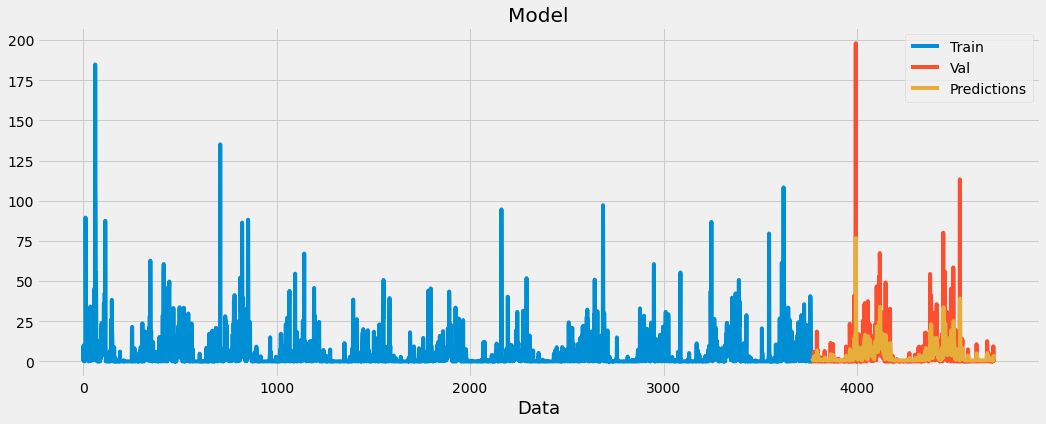

In [23]:
import warnings
warnings.filterwarnings("ignore")


#Plot the data
train = datasetCSV[:training_data_len]
valid = datasetCSV[training_data_len:]
valid['Predictions'] = predictions
# #Visualize the data
plt.figure( figsize = (16,6))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.plot(train['totalprecipMM'])
plt.plot(valid[['totalprecipMM', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'upper right')



In [24]:
#Show the actual rain and predicted Temp
print(valid)
# print(valid['Predictions'])

      totalprecipMM  Predictions
3768            0.0     1.879199
3769            0.2     1.442229
3770            0.0     1.171064
3771            0.0     0.982424
3772            0.0     0.858787
...             ...          ...
4704            9.4     0.607924
4705            2.1     3.368498
4706            0.4     2.513431
4707            0.7     1.863585
4708            0.1     1.462554

[941 rows x 2 columns]


In [26]:
#Get the last 365 day rain values
df = datasetARR
last_365_days = df[4342:]

#Scale the data to be values betweeen 0 and 1
last_365_days_scaled = scaler.transform(last_365_days)

#Create an empty list
X_test = []

#Append the past 365 days
X_test.append(last_365_days_scaled)

#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled rain
pred_rain = model.predict(X_test)
pred_rain = scaler.inverse_transform(pred_rain)

print('\nThis is the predicted rain in mm for today:\n')
print(pred_rain)



This is the predicted rain in mm for today:

0.001254


In [ ]:
import http.client
import urllib
import time

key = "1R57OC7KVYD74ELR"  # Put your API Key here
predicted_value = 555

params = urllib.parse.urlencode({'field1': predicted_value, 'key': key})
headers = {"Content-typZZe": "application/x-www-form-urlencoded", "Accept": "text/plain"}
conn = http.client.HTTPConnection("api.thingspeak.com:80")
try:
    conn.request("POST", "/update", params, headers)
    response = conn.getresponse()
    print(predicted_value)
    print(response.status, response.reason)
    data = response.read()
    conn.close()
except:
    print("connection failed")